# Sentiment Analysis

In [178]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from wordcloud import WordCloud

In [179]:
import warnings
warnings.filterwarnings('ignore')

In [180]:
dft = pd.read_csv("/content/hashtag_donaldtrump.csv", lineterminator='\n')
dfj = pd.read_csv("/content/hashtag_joebiden.csv", lineterminator='\n')

In [181]:
dft.columns, dfj.columns

(Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
        'user_id', 'user_name', 'user_screen_name', 'user_description',
        'user_join_date', 'user_followers_count', 'user_location', 'lat',
        'long', 'city', 'country', 'continent', 'state', 'state_code',
        'collected_at'],
       dtype='object'),
 Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
        'user_id', 'user_name', 'user_screen_name', 'user_description',
        'user_join_date', 'user_followers_count', 'user_location', 'lat',
        'long', 'city', 'country', 'continent', 'state', 'state_code',
        'collected_at'],
       dtype='object'))

In [182]:
dft.shape, dfj.shape

((970919, 21), (776886, 21))

In [183]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [184]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [185]:
dft["candidate"] = "trump"
dfj["candidate"] = "biden"

In [186]:
df = pd.concat([dft, dfj])

In [187]:
df.shape

(1747805, 22)

In [188]:
df.dropna(inplace=True)

df.shape

(345224, 22)

In [189]:
df["country"].value_counts()

,count
country,
United States of America,182382
United Kingdom,31869
India,20931
France,19996
Germany,18534
Canada,16250
The Netherlands,8491
Australia,8330
Spain,5254


In [190]:
tweet_count = df.groupby("candidate")["tweet"].count().reset_index()

tweet_count.head()

,candidate,tweet
0,biden,155948
1,trump,189276


In [191]:
fig = px.bar(tweet_count, x="candidate", y="tweet", color="candidate", color_discrete_map={"Trump":"blue", "Biden": "green"}, labels={"candidate":"Candidate", "tweet":"No of tweets"}, title="Tweets for candidates")
fig.show()

In [192]:
likes_comparison = df.groupby("candidate")["likes"].sum().reset_index()

likes_comparison

,candidate,likes
0,biden,2736567.0
1,trump,2267712.0


In [193]:
fig = px.bar(
    likes_comparison,
    x="candidate",
    y="likes",
    title="No of likes per candidate",
    color="candidate",
    color_discrete_map={"Trump":"blue", "Biden": "green"},
    labels={"candidate":"Candidate", "tweet":"No of tweets"}
)

fig.update_layout(plot_bgcolor="lightgray", paper_bgcolor="lightgray")

fig.show()

In [194]:
top_10_country = df.groupby("country")["tweet"].count().sort_values(ascending=False).reset_index().head(10)

top_10_country

,country,tweet
0,United States of America,182382
1,United Kingdom,31869
2,India,20931
3,France,19996
4,Germany,18534
5,Canada,16250
6,The Netherlands,8491
7,Australia,8330
8,Spain,5254
9,Brazil,4211


In [195]:
fig = px.bar(
    top_10_country,
    x="country",
    y="tweet",
    color_discrete_sequence=px.colors.qualitative.Dark24,
    title="Top 10 contries tweet counts"
    )
fig.show()

In [196]:
tweet_df = df.groupby(['country', 'candidate'])[
    'tweet'].count().reset_index()

tweeters = tweet_df[tweet_df['country'].isin(top_10_country.country)]
tweeters

,country,candidate,tweet
2,Australia,biden,3181
3,Australia,trump,5149
10,Brazil,biden,2063
11,Brazil,trump,2148
15,Canada,biden,6011
16,Canada,trump,10239
25,France,biden,8564
26,France,trump,11432
27,Germany,biden,7077
28,Germany,trump,11457


In [197]:
fig = px.bar(
    tweeters,
    x='country',
    y='tweet',
    color='candidate',
    labels={'country': 'Country', 'tweet': 'Number of Tweets',
                     'candidate': 'Candidate'},
    title='Tweet Counts for Each Candidate in the Top 10 Countries',
    barmode='group'
    )

fig.show()

In [198]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text))

    text = text.lower()

    text = re.sub('[^a-z]', ' ', text)

    text = text.split()

    lm = WordNetLemmatizer()

    text = [lm.lemmatize(word) for word in text if word not in set(
        stopwords.words('english'))]

    text = ' '.join(word for word in text)

    return text


def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [211]:
trump_tweets = df[df['candidate'] == 'trump']

trump_tweets = trump_tweets.loc[trump_tweets.country == 'United States of America']
trump_tweets = trump_tweets[['tweet']]

trump_tweets.head()

,tweet
2,"#Trump: As a student I used to hear for years,..."
4,You get a tie! And you get a tie! #Trump ‘s ra...
11,"In 2020, #NYPost is being #censorship #CENSORE..."
12,#Trump #PresidentTrump #Trump2020LandslideVict...
22,"#Trump: Nobody likes to tell you this, but som..."


In [212]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)

trump_tweets.head()

,tweet,cleantext
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...


In [213]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [214]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [215]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


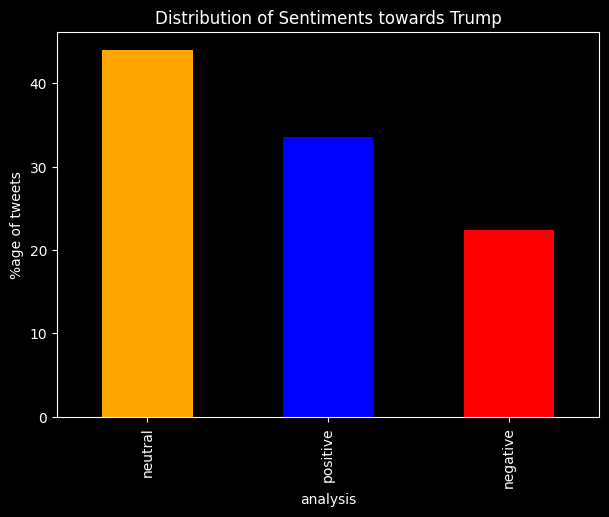

In [216]:
plt.style.use('dark_background')

colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7, 5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Trump")
plt.show()

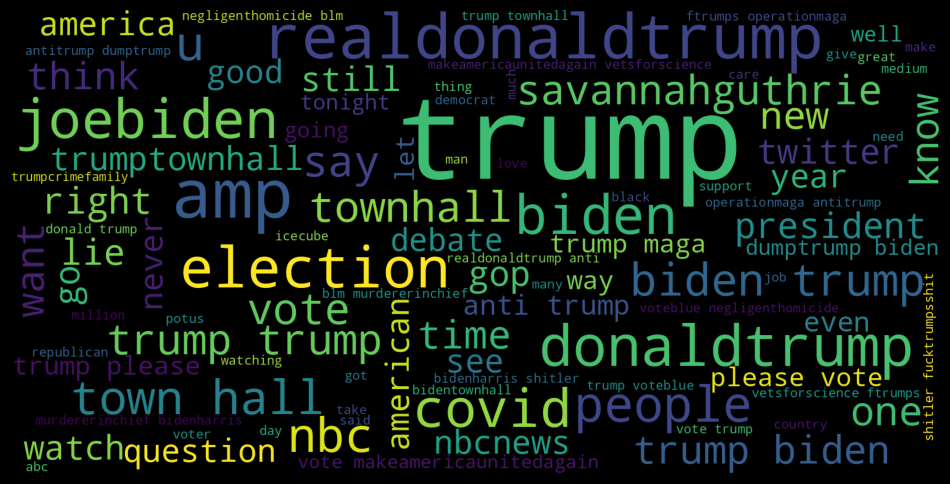

In [219]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def word_cloud(wd_list):
	stopwords = set(STOPWORDS)
	all_words = ' '.join(wd_list)
	wordcloud = WordCloud(background_color='black',
						stopwords=stopwords,
						width=1600, height=800, max_words=100, max_font_size=200,
						colormap="viridis").generate(all_words)
	plt.figure(figsize=(12, 10))
	plt.axis('off')
	plt.imshow(wordcloud)

word_cloud(trump_tweets['cleantext'][:5000])

In [221]:
biden_tweets = df[df['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'United States of America']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
6,"In 2020, #NYPost is being #censorship #CENSORE..."
17,"Comments on this? ""Do Democrats Understand how..."
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...
...,...
776836,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | ..."
776845,Will #criticalRaceTheory become ubiquitous in ...
776847,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861,#election #2020Elections #trump #biden https:/...


In [222]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


In [223]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,1.000000,-1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...,0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...,0.178571,0.078571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.000000,0.000000,neutral


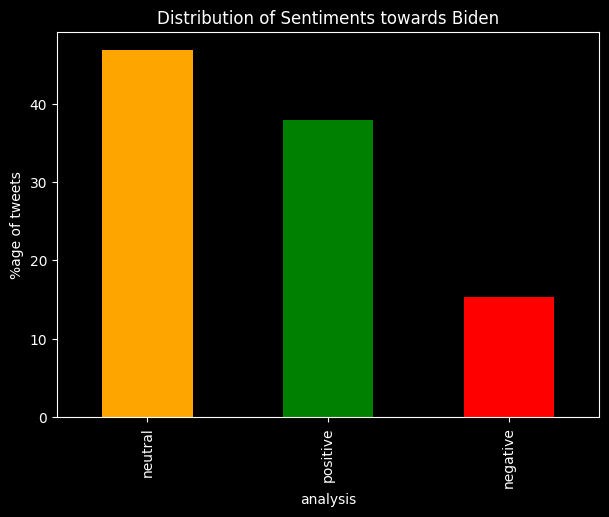

In [224]:
plt.style.use('dark_background')

colors = ['orange', 'green', 'red']

plt.figure(figsize=(7, 5))
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

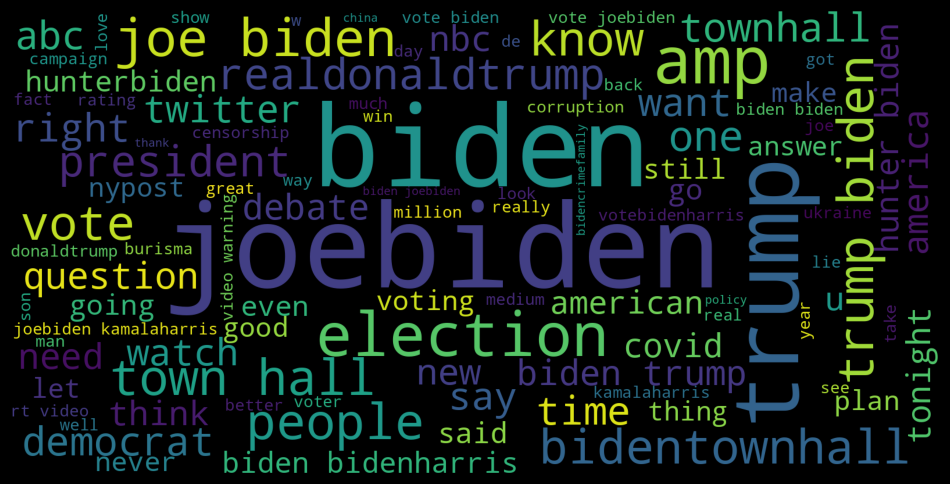

In [225]:
word_cloud(biden_tweets['cleantext'][:5000])